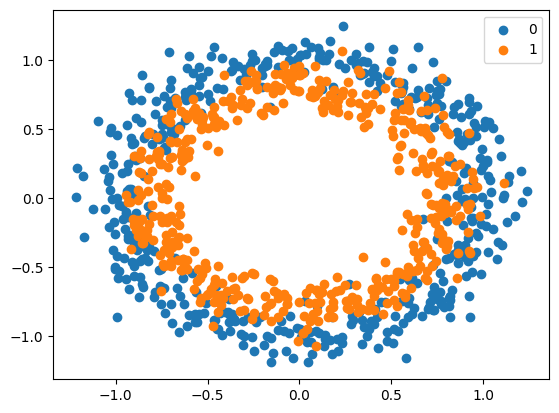

In [5]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
 samples_ix = where(y == i)
 pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [7]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [8]:
X

array([[ 0.74687088, -0.05795133],
       [-0.45101989, -0.63961396],
       [ 0.74424515, -0.60720104],
       ...,
       [ 0.24140399, -0.53839033],
       [-0.76482802,  0.03402733],
       [ 0.83412848,  0.42920794]])

In [9]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [10]:
trainX

array([[ 7.46870881e-01, -5.79513293e-02],
       [-4.51019888e-01, -6.39613958e-01],
       [ 7.44245153e-01, -6.07201040e-01],
       [-9.19879711e-02, -7.53110957e-01],
       [-8.37170550e-01,  1.82015599e-01],
       [ 3.29313662e-01, -5.01342819e-01],
       [-7.44437098e-01, -1.55530335e-01],
       [-3.70812166e-01, -4.25049049e-01],
       [-6.76848755e-01, -3.14795573e-01],
       [ 7.08860251e-01,  4.61623034e-01],
       [ 5.11271340e-01, -5.28951607e-01],
       [-2.18894547e-01,  8.33468535e-01],
       [ 6.21027611e-01, -1.25678488e-01],
       [-2.96992739e-01, -7.41293416e-01],
       [ 6.30276071e-01, -2.66889436e-01],
       [-1.05450588e-01,  8.85421964e-01],
       [ 2.67169311e-01,  7.19251851e-01],
       [ 7.12615944e-01,  3.53823824e-02],
       [ 2.87132706e-01,  6.00869552e-01],
       [ 9.46805549e-01, -1.25640239e-01],
       [-5.33786295e-01,  1.44951337e-01],
       [ 7.07201713e-01, -3.28872294e-01],
       [ 2.49664200e-01,  7.38132248e-01],
       [ 6.

In [14]:
# define model
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

C:\tensor1\venv\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


C:\tensor1\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train: 0.788, Test: 0.794


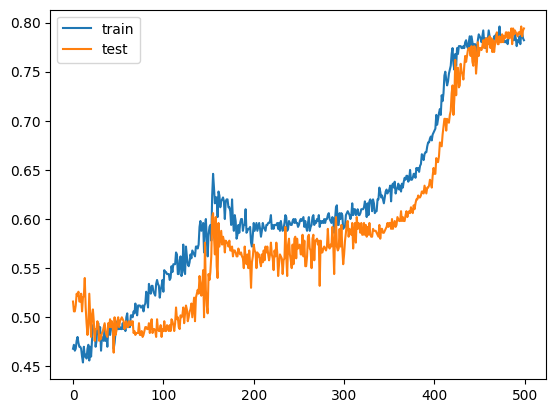

In [15]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()